In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Literal, Optional
from sklearn.manifold import TSNE
from umap import UMAP
import itertools
from pathlib import Path
from loguru import logger
from matplotlib.axes import Axes

from histaug.extract_features.kather100k import load_features

/app/env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/env/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was no

KeyboardInterrupt: 

In [ ]:
# model = "ctranspath"
# features = load_features(f"/app/results/kather100k_{model}.h5", remove_classes=["BACK"])

In [10]:
def visualize_embeddings(
    feats: np.ndarray,  # [n_samples, n_features]
    feats_aug: np.ndarray,  # [n_samples, n_features]
    labels: np.ndarray,  # [n_samples] (strings)
    augmentation: str,
    model: str,
    technique: Literal["tsne", "umap", "umap-separate"] = "tsne",
    metric: Literal["euclidean", "cosine", "manhattan"] = "euclidean",
    tsne_perplexity: int = 30,
    umap_n_neighbors: int = 50,
    umap_min_dist: float = 0.1,
    ax: Optional[Axes] = None,
):
    classes = sorted(np.unique(labels))
    label2class = {label: i for i, label in enumerate(classes)}

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    # Generate embeddings using t-SNE
    feats_cat = np.concatenate([feats, feats_aug], axis=0)
    if technique == "tsne":
        feats_embedded = TSNE(
            n_components=2,
            learning_rate="auto",
            init="pca",
            random_state=0,
            perplexity=tsne_perplexity,
            metric=metric,
        ).fit_transform(feats_cat)
        feats_embedded, feats_aug_embedded = np.split(feats_embedded, 2, axis=0)
    elif technique == "umap":
        feats_embedded = UMAP(
            n_components=2, random_state=0, n_neighbors=umap_n_neighbors, min_dist=umap_min_dist, metric=metric
        ).fit_transform(feats_cat)
        feats_embedded, feats_aug_embedded = np.split(feats_embedded, 2, axis=0)
    elif technique == "umap-separate":
        umap = UMAP(n_components=2, random_state=0, n_neighbors=umap_n_neighbors, min_dist=umap_min_dist, metric=metric)
        feats_embedded = umap.fit_transform(feats)
        feats_aug_embedded = umap.transform(feats_aug)

    # Use a colormap to map labels to colors
    cmap = matplotlib.colormaps["tab10"]  # 'tab10' is a colormap suitable for categorical data up to 10 categories

    # Draw lines and annotations
    for f, f_reflect, label in zip(feats_embedded, feats_aug_embedded, labels):
        # ax.plot([f[0], f_reflect[0]], [f[1], f_reflect[1]], c="k", alpha=0.1)
        ax.plot([f[0], f_reflect[0]], [f[1], f_reflect[1]], c=cmap.colors[label2class[label]], alpha=0.3)

    # Scatter plots
    ax.scatter(feats_embedded[:, 0], feats_embedded[:, 1], c=[label2class[l] for l in labels], s=2, cmap=cmap)

    # Add a colorbar to indicate which colors correspond to which labels
    norm = matplotlib.colors.Normalize(vmin=0, vmax=len(classes) - 1)
    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = ax.get_figure().colorbar(
        mappable=sm, boundaries=np.arange(len(classes) + 1) - 0.5, orientation="horizontal", ax=ax
    )
    cbar.set_ticks(range(len(classes)))
    cbar.set_ticklabels(classes)
    cbar.set_label("Patch class")

    technique_kwargs = (
        dict(perplexity=tsne_perplexity)
        if technique == "tsne"
        else dict(n_neighbors=umap_n_neighbors, min_dist=umap_min_dist)
    )
    technique_kwargs["metric"] = metric
    technique_kwargs = ", ".join(f"{k}={v}" for k, v in technique_kwargs.items())
    ax.set_title(
        f"{'t-SNE' if technique == 'tsne' else 'UMAP'} of {model} features\nfor augmentation {augmentation}\n{technique_kwargs}"
    )
    ax.set_xticks([])
    ax.set_yticks([])


# augmentation = "Macenko"
# augmentation = "low saturation"

# metric = "cosine"
# metric = "euclidean"
# # metric = "manhattan"

# N = 10000
# feats = features.feats[:N]
# feats_aug = features.feats_augs[augmentation][:N]
# labels = features.labels[:N]

# technique_kwargs = dict(
#     technique="tsne",
#     tsne_perplexity=30,
# )

# # technique_kwargs = dict(
# #     technique="umap",
# #     umap_n_neighbors=50,
# #     umap_min_dist=0.1,
# # )

# visualize_embeddings(
#     feats=feats,
#     feats_aug=feats_aug,
#     labels=labels,
#     augmentation=augmentation,
#     metric=metric,
#     **technique_kwargs,
# )
# pass

2023-09-10 17:49:26.630 | INFO     | __main__:<module>:34 - Generating plots for /app/figures/visualize_embeddings/tsne-tsne_perplexity=3.png
2023-09-10 17:49:26.792 | DEBUG    | __main__:<module>:40 - Generating tsne plot for metric='cosine' and augmentation='Macenko' with tsne_perplexity=3
2023-09-10 17:49:27.648 | DEBUG    | __main__:<module>:40 - Generating tsne plot for metric='cosine' and augmentation='low saturation' with tsne_perplexity=3
2023-09-10 17:49:28.654 | DEBUG    | __main__:<module>:40 - Generating tsne plot for metric='cosine' and augmentation='rotate random angle' with tsne_perplexity=3
2023-09-10 17:49:29.483 | DEBUG    | __main__:<module>:40 - Generating tsne plot for metric='euclidean' and augmentation='Macenko' with tsne_perplexity=3
2023-09-10 17:49:30.562 | DEBUG    | __main__:<module>:40 - Generating tsne plot for metric='euclidean' and augmentation='low saturation' with tsne_perplexity=3
2023-09-10 17:49:31.687 | DEBUG    | __main__:<module>:40 - Generating 

ValueError: perplexity must be less than n_samples

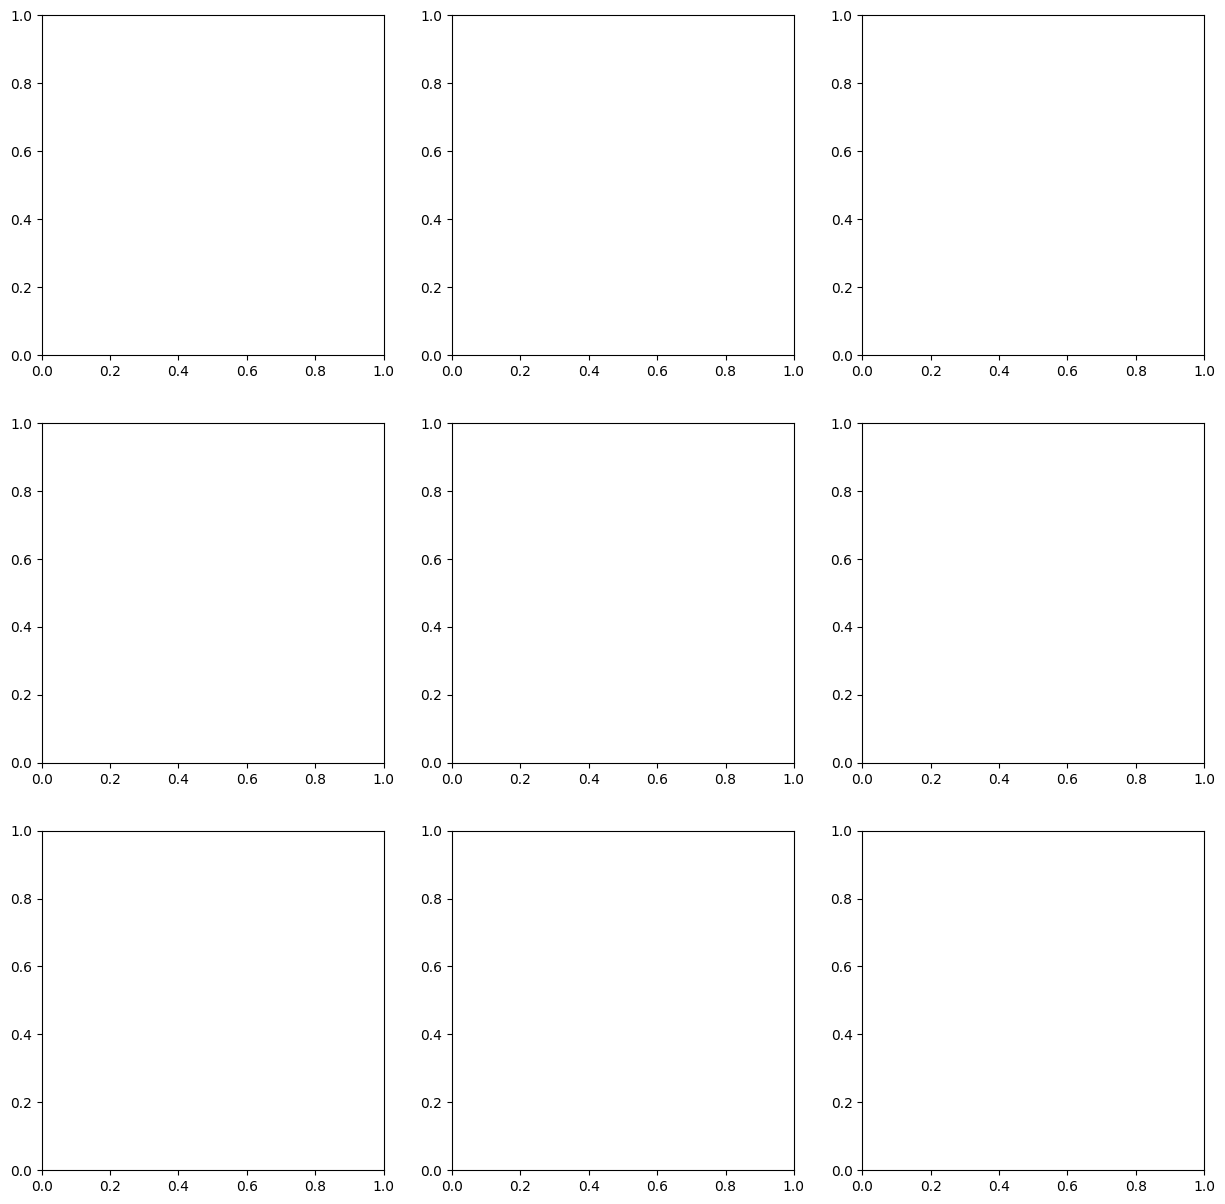

In [15]:
N = 10000
# N = 100

models = "ctranspath", "swin", "retccl", "resnet"
metrics = "cosine", "euclidean", "manhattan"
techniques = "tsne", "umap"  # , "umap-separate"
augmentations = "low saturation", "Macenko", "rotate random angle"

figures_dir = Path("/app/figures/visualize_embeddings")
figures_dir.mkdir(exist_ok=True)

for model in models:
    features = load_features(f"/app/results/kather100k_{model}.h5", remove_classes=["BACK"])

    feats = features.feats[:N]
    feats_augs = {k: v[:N] for k, v in features.feats_augs.items()}
    labels = features.labels[:N]

    for technique in techniques:  # , "umap-separate":
        for kwargs in (
            [dict(tsne_perplexity=p) for p in (3, 5, 10, 30, 50, 100, 1000, 5000)]
            if technique == "tsne"
            else [
                dict(umap_min_dist=d, umap_n_neighbors=n)
                for d, n in itertools.product((0.1, 0.5, 0.8, 0.99), (3, 5, 10, 30, 50, 100))
            ]
        ):
            kwargs_str = ",".join(f"{k}={v}" for k, v in kwargs.items())
            output_file = figures_dir / f"{technique}-{kwargs_str}.png"

            if output_file.exists():
                logger.info(f"Skipping {output_file} as it already exists")
                continue
            logger.info(f"Generating plots in {output_file}")
            fig, axes = plt.subplots(
                len(metrics), len(augmentations), figsize=(len(augmentations) * 5, len(metrics) * 5)
            )
            for metric, row_axes in zip(metrics, axes):
                for augmentation, ax in zip(augmentations, row_axes):
                    logger.debug(f"Generating {technique} plot for {metric=} and {augmentation=} with {kwargs_str}")
                    visualize_embeddings(
                        feats,
                        feats_augs[augmentation],
                        labels,
                        augmentation,
                        model=model,
                        technique=technique,
                        metric=metric,
                        ax=ax,
                        **kwargs,
                    )
                    ax.set_title(f"{augmentation} ({metric})")
            # fig.tight_layout()
            plt.suptitle(f"{model} ({technique}, {kwargs_str})", fontsize=18)
            fig.savefig(output_file)
            plt.close(fig)
            logger.info(f"Saved {output_file}")